训练集形状: (60000, 28, 28)
标签集形状: (60000,)


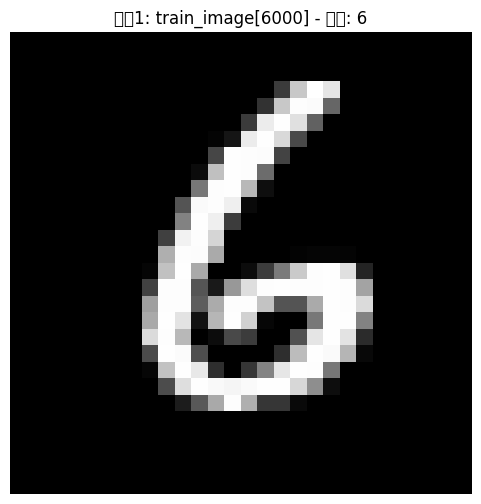

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 假设你已经加载了MNIST数据集
# 这里我们使用Keras来加载数据作为示例
from tensorflow.keras.datasets import mnist

# 加载MNIST数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"训练集形状: {train_images.shape}")
print(f"标签集形状: {train_labels.shape}")

# 任务1: 打印 train_image[6000] 图像
plt.figure(figsize=(6, 6))
plt.imshow(train_images[6000], cmap='gray')
plt.title(f'任务1: train_image[6000] - 标签: {train_labels[6000]}')
plt.axis('off')
plt.show()

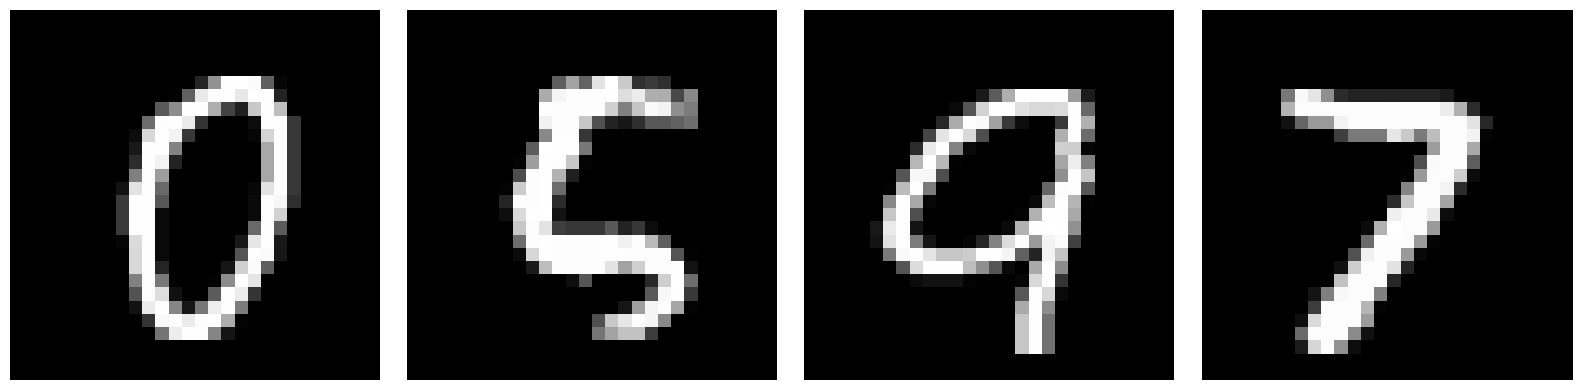

In [13]:
# 任务2: 在子图中显示四个图像（横向排列）- 无任何标签和刻度
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# 图像索引列表
image_indices = [1000, 2000, 3000, 4000]

for i, idx in enumerate(image_indices):
    # 只显示图像，不显示任何标签、标题或刻度
    axes[i].imshow(train_images[idx], cmap='gray')
    axes[i].axis('off')  # 关闭所有坐标轴和刻度

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)  # 减小子图之间的间距
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 加载MNIST数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 数据预处理
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("数据预处理完成！")
print(f"训练图像形状: {train_images.shape}")
print(f"测试图像形状: {test_images.shape}")

# 作业3: 创建模型，将隐藏层节点数从256改为128
print("\n" + "="*60)
print("作业3: 创建模型（隐藏层节点数: 128）")
print("="*60)

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # 输入层，将28x28图像展平
    layers.Dense(128, activation='relu'),     # 作业3修改：隐藏层节点数从256改为128
    layers.Dense(64, activation='relu'),      # 额外的隐藏层
    layers.Dense(10, activation='softmax')    # 输出层，10个类别
])

# 显示模型摘要
print("模型架构摘要:")
model.summary()

数据预处理完成！
训练图像形状: (60000, 28, 28, 1)
测试图像形状: (10000, 28, 28, 1)

作业3: 创建模型（隐藏层节点数: 128）
模型架构摘要:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 作业4: 使用SGD优化器代替Adam
print("\n" + "="*60)
print("作业4: 使用SGD优化器编译模型")
print("="*60)

# 使用SGD优化器而不是Adam
model.compile(optimizer='sgd',  # 作业4修改：使用SGD代替Adam
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("模型编译完成！")
print("优化器: SGD")
print("损失函数: categorical_crossentropy")
print("评估指标: accuracy")

# 训练模型（可选）
print("\n开始训练模型...")
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# 评估模型
print("\n评估模型性能...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"测试集准确率: {test_acc:.4f}")


作业4: 使用SGD优化器编译模型
模型编译完成！
优化器: SGD
损失函数: categorical_crossentropy
评估指标: accuracy

开始训练模型...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6784 - loss: 1.1507 - val_accuracy: 0.9057 - val_loss: 0.3370
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9027 - loss: 0.3424 - val_accuracy: 0.9222 - val_loss: 0.2689
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9226 - loss: 0.2725 - val_accuracy: 0.9322 - val_loss: 0.2328
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9324 - loss: 0.2382 - val_accuracy: 0.9410 - val_loss: 0.2071
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9391 - loss: 0.2097 - val_accuracy: 0.9492 - val_loss: 0.1854

评估模型性能...
测试集准确率: 0.9459


In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# 加载数据
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 预处理
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# 创建模型
def create_simple_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 训练并比较
print("训练 epochs=2:")
model_2 = create_simple_model()
history_2 = model_2.fit(train_images, train_labels, epochs=2, validation_split=0.2, verbose=0)
test_loss_2, test_acc_2 = model_2.evaluate(test_images, test_labels, verbose=0)

print("训练 epochs=5:")
model_5 = create_simple_model()
history_5 = model_5.fit(train_images, train_labels, epochs=5, validation_split=0.2, verbose=0)
test_loss_5, test_acc_5 = model_5.evaluate(test_images, test_labels, verbose=0)

print(f"\n结果对比:")
print(f"epochs=2 - 测试准确率: {test_acc_2:.4f}")
print(f"epochs=5 - 测试准确率: {test_acc_5:.4f}")
print(f"准确率提升: {test_acc_5 - test_acc_2:.4f}")

训练 epochs=2:
训练 epochs=5:

结果对比:
epochs=2 - 测试准确率: 0.9138
epochs=5 - 测试准确率: 0.9336
准确率提升: 0.0198
